# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
try:
  data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

except FileNotFoundError:
  data = pd.read_csv('/content/real_estate_data.csv', sep='\t')
  
display(data.head())
data.info()
print('Число дубликатов:', data.duplicated().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

В таблице нет дубликатов, 23699 строк, в некоторых столбцах есть пропуски. Попробуем их проработать. Сначала приведем к нужному типу данных столбцы без пропусков.

## Предобработка данных

### Приведение данных к нужному формату

In [ ]:
# Приводим в целочисленный тип данных стоимость квартир, потому что во всех ячейках стоимость указана целыми числами.
data['last_price'] = data['last_price'].astype(int)
# Приводим к типу даты дату публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Поработаем с пропусками в различных столбцах и некторые данные переведем для удобства анализа в нужный форма.

### is_apartment

In [ ]:
print(data['is_apartment'].unique()) # Смотрим уникальные значения
print(data['is_apartment'].sum()) # Выясняем количество аппартаментов. 

[nan False True]
50


Заполним пропущенные ячейки значением False, предполагая, что если ячейка не была заполнена, то жилье не является аппартаментами.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'] = data['is_apartment'].astype(bool) #Меняем тип данных на логический

### balcony, parks_around3000, ponds_around3000

Заменяем пропущенные значения в balcony, parks_around3000, ponds_around3000 на 0, предполагая, что если ячейки не были заполнены, этих данных нет в реальности. Приводим данные к целочисленному, потому что количество объектов (балконов, парков и прудов) может быть только целым числом.

In [ ]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

# Смотрим количество пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Также отлично

### floors_total

In [ ]:
print("Пропущенных значение:", data['floors_total'].isna().sum())

Пропущенных значение: 86


Удалим пропуски, поскольку мы не можем их заполнить. Изменим тип данных столбца на целочисленный, потому что количество этажей может быть только целым

In [ ]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype('int')
print("Пропущенных значение:", data['floors_total'].isna().sum())

Пропущенных значение: 0


### locality_name

In [ ]:
print("Пропущенных значение:", data['locality_name'].isna().sum())

Пропущенных значение: 48


Удалим пропуски, поскольку мы не можем из заполнить.

In [ ]:
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isna().sum()

0

### ceiling_height

Заменим пустые значения высоты потолков на медианные значения.

In [ ]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data['ceiling_height'].isna().sum() # Проверяем количество пропущенных значений

0

### living_area и kitchen_area

В датафрейме у нас есть общая площадь жилья. И от нее зависит площадь кухни и жилая площадь. Введем коэффициент, который показывает отношение средней жилой/кухонной площади к общей средней площади жилья.

In [ ]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()

Заменяем пустые значения жилой и кухонной площади на значения общей площади квартиры умноженные на нужный коэффициент.

In [ ]:
# Заменяем пустые значения жилой площади и площади кухни
data['living_area'].fillna(data['total_area'] * living_ratio, inplace=True)
print(data['living_area'].isna().sum())
data['kitchen_area'].fillna(data['total_area'] * kitchen_ratio, inplace=True)
data['kitchen_area'].isna().sum()

0


0

Проверяем сколько пропусков осталось:

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Оставшиеся пропуски заменить мы не можем. Оставим данные не заполненными.

### Выводы:
Для удобства последующей работы с данными перевели столбец с датой публикации объявлений в формат даты, а столбцы количество балконов, этажей, парков и озер недалеко от жилья, а также стоимость недвижимости перевели в целочислненный формат.
Заполнили пропуски в столбце "Высота потолков" медианными значениями, а в столбце "Площадь кухни и жилая площадь" расчетными данными исходя из средних значений отношения ко всей площади. 
Небольшую часть данных в столбцах "Название населенного пункта", "Этаж" удалили, потому что не можем заполнить эти пропуски. 

## Расчёты и добавление результатов в таблицу

Расчет стоимости квадратного метра

In [ ]:
data['price_per_m2'] = data['last_price'] / data['total_area']

День недели, месяц и год публикации объявлений

In [ ]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year


Группировка квартир по этажам (первый, последний, другой)

In [ ]:
def floor_group(row):
    if row['floor'] == 1:
        return 'fist'
    if row['floor'] == row['floors_total']:
        return 'last'
    return 'other'
data['floor_type'] = data.apply(floor_group, axis=1)


Соотношение жилой и общей площади / площади кухни и общей площади

In [ ]:
data['living_ratio'] = data['living_area'] / data['total_area']
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_type,living_ratio,kitchen_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,NaN,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0,NaN,81.0,82920.792079,1,12,2018,fist,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,2,574.0,558.0,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,...,3,234.0,424.0,408176.100629,4,7,2015,other,0.571174,0.175075
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,1,48.0,121.0,100000.000000,1,6,2018,other,0.320000,0.410000


## Исследовательский анализ данных

### Исследование основных данных: площадь и стоимость квартир, число комнат, высота потолков.

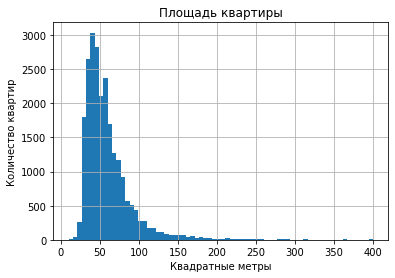

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [ ]:
plt.hist(data['total_area'], bins=70, range=(10, 400))
plt.grid(True)
plt.title('Площадь квартиры')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

data['total_area'].describe()

По графику видим, что основной объем квартир находится в интервале от 30 до 90 кв. метров. Что является вполне адекватным. Большинство квартир - от 30 до 100 квадратных метров. Это является реальными данными. Среднее и медианное значения не сильно отличаются друг от друга, это может показывать, площадь квартир однообразна. Есть небольшое количество квартир площадью больше 100 квадратных метров.

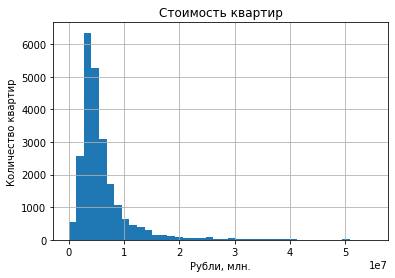

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [ ]:
plt.hist(data['last_price'], bins=40, range=(0, 55000000))
plt.grid(True)
plt.title('Стоимость квартир')
plt.xlabel('Рубли, млн.')
plt.ylabel('Количество квартир')
plt.show()

data['last_price'].describe()

В основном стоимость квартир укладывается в интревал от 2 до 8 миллионов. Квартиры стоимостью больше 10 миллионов встречаются редко.

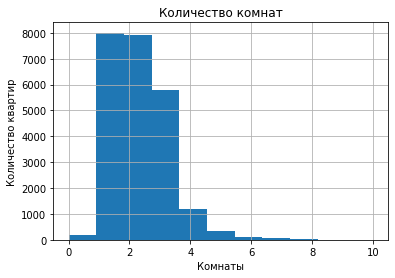

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [ ]:
plt.hist(data['rooms'], bins=11, range=(0, 10))
plt.grid(True)
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')
plt.show()

data['rooms'].describe()

Из графика видим, что количество комнат лежит в интервале от 1 до 3 комнат. В основном квартиры 1, 2 и 3 комнатные. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 5 комнат выглядят подозрительно. Воможно, это бывшие коммунальные квартиры или объединенное жилье.

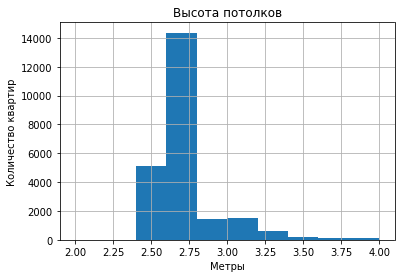

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [ ]:
plt.hist(data['ceiling_height'], bins=10, range=(2, 4))
plt.grid(True)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()


data['ceiling_height'].describe()


Основная масса квартир по высоте потолков лежит в интервале от 2,4 до 2,75 м.

### Изучение времени продажи квартир.

Медиана срока продажи: 95.0
Среднее значение сроков продажи: 180.74


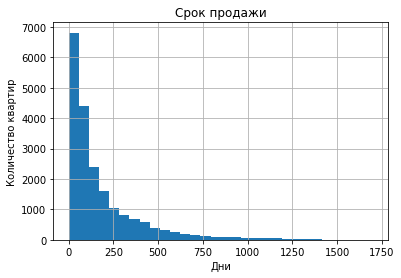

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [ ]:
print('Медиана срока продажи:', data['days_exposition'].median())
print('Среднее значение сроков продажи:', data['days_exposition'].mean().round(2))

# Гистограма сроков продажи жилья
plt.hist(data['days_exposition'], bins=30, range=(0,1700))
plt.grid(True)
plt.title('Срок продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Аналитические значения срока продажи
data['days_exposition'].describe()

На диаграмме размаха подробнее изучим данные.

<AxesSubplot:>

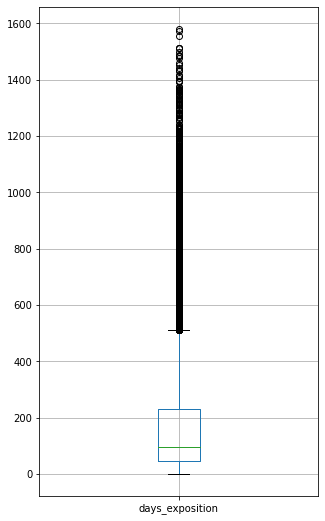

In [ ]:
data.boxplot(column='days_exposition',  figsize=(5,9))

По диаграмме видим, что в данных существует выброс из необычайно длинных сроков продаж. Сроки больше 700 дней будем считать необычайно длинными.

Медианное время продажи - 95 дней. Средний срок продажи - 181 день. В основном квартиры продаются за срок в 125 дней. Большинство квартир продается за период до 75 дней. А также есть варианты жилья, которое продавалось больше года.

Быстрой продажей можно назвать срок до 45 дней. Необычайно долгие продажи - 500 дней и дольше.

### Редкие и выбивающиеся значения

Будем считать, что редкие и выбивающиеся значения лежал за границами 1,5 межквартильных размахов. 
Создадим функцию, которая вычисляет значения размахов. Далее напишем цикл, который будет перебирать все нужные нам столбцы и отбросит данные, выходящие за границу 1,5 межквартильных размахов. 

In [ ]:
display(data.describe()) # Для сравнения с отфильтрованными данными

def quartile_range(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    data_quar = data.loc[(data[column] < q3 + 1.5 * iqr) & (data[column] > q1 - 1.5 * iqr), column]
    return data_quar

list_works = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_works:
    data[col] = quartile_range(data, col)

data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,living_ratio,kitchen_ratio
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,...,8030.000000,23565.000000,9036.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.592277,5.878124,10.499898,0.593677,...,490.580448,0.589900,518.289509,180.741395,9.940584e+04,2.567367,6.401570,2017.371016,0.565431,0.186183
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.373679,4.871485,6.037750,0.960660,...,341.572956,0.883966,278.009558,219.732782,5.038943e+04,1.788279,3.492948,1.037393,0.101071,0.069545
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,45.000000,7.656613e+04,1.000000,3.000000,2017.000000,0.500000,0.136738
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,0.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.571174,0.175075
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,...,612.000000,1.000000,730.000000,231.000000,1.142132e+05,4.000000,10.000000,2018.000000,0.631732,0.223881
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,living_ratio,kitchen_ratio
count,23565.000000,2.151900e+04,22326.000000,23371.000000,20601.000000,23565.000000,22682.000000,23565.000000,22250.000000,23565.000000,...,8030.000000,23565.000000,9036.000000,18721.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,4.837115e+06,54.319704,2.030208,2.631089,10.675875,31.526984,5.878124,9.417840,0.593677,...,490.580448,0.589900,518.289509,128.299343,9.940584e+04,2.567367,6.401570,2017.371016,0.565431,0.186183
std,5.681156,2.215774e+06,19.331030,0.973563,0.081473,6.594823,13.752739,4.871485,3.177523,0.960660,...,341.572956,0.883966,278.009558,121.064671,5.038943e+04,1.788279,3.492948,1.037393,0.101071,0.069545
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.300000e+06,39.400000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,41.000000,7.656613e+04,1.000000,3.000000,2017.000000,0.500000,0.136738
50%,9.000000,4.400000e+06,50.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,0.000000,503.000000,85.000000,9.500000e+04,3.000000,6.000000,2017.000000,0.571174,0.175075
75%,14.000000,6.000000e+06,65.500000,3.000000,2.650000,16.000000,40.600000,8.000000,11.000000,1.000000,...,612.000000,1.000000,730.000000,182.000000,1.142132e+05,4.000000,10.000000,2018.000000,0.631732,0.223881
max,50.000000,1.186686e+07,114.200000,5.000000,2.850000,60.000000,76.700000,33.000000,19.450000,5.000000,...,3190.000000,3.000000,1344.000000,509.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.000000,0.787879


### Выявление факторов, влияющих на стоимость квартиры.

#### Зависимость цены от площади

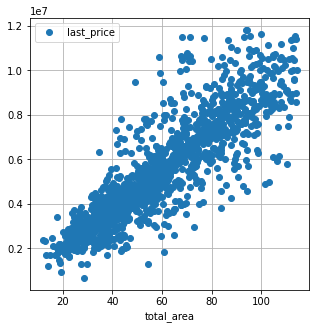

0.6940523107096925

In [ ]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
 
data['last_price'].corr(data['total_area'])

Прослеживается зависимость стоимости жилья от площади квартиры. Это соответсвует реальности рынка.

#### Зависимость цены от количества комнат

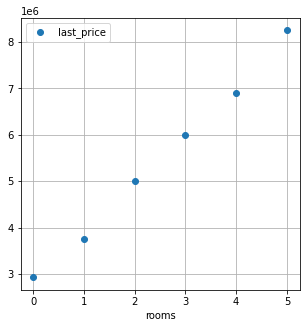

0.4489073417026343

In [ ]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
 
data['last_price'].corr(data['rooms'])

Коэффициент корреляции показывает умеренную связь между количеством комнат и стоимостью жилья. Это кажется странным, ведь в реальной жизни зависимость сильная.

#### Зависимость стоимости квартир от удаленности от центра

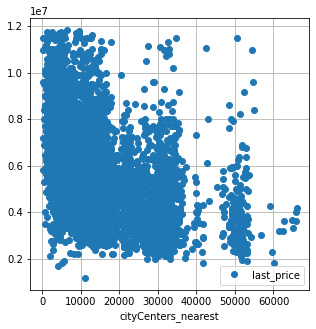

-0.3449266550741806

In [ ]:
(
    data.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
 
data['last_price'].corr(data['cityCenters_nearest'])

Коэффициент корреляции показывает слабую отрицательную связь между удаленностью от центра и стоимостью квартиры. Считаю это странным, потому что квартиры в центре всегда стоят дороже, возможно стоит анализировать не стоимость за квартиру, а стоимость квадратного метра. Проверим нашу теорию:

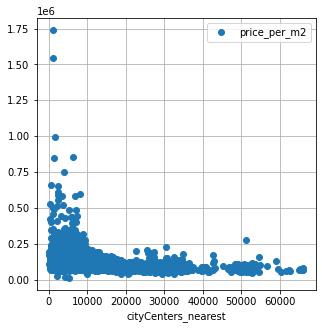

-0.3175963216944461

In [ ]:
(
    data.pivot_table(index='cityCenters_nearest', values='price_per_m2')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
 
data['price_per_m2'].corr(data['cityCenters_nearest'])

Видим слабую связь между стоимостью квартир за квадратный метр и удаленностью от центра.

#### Зависимость стоимости квартиры от дня недели, месяца и года размещения

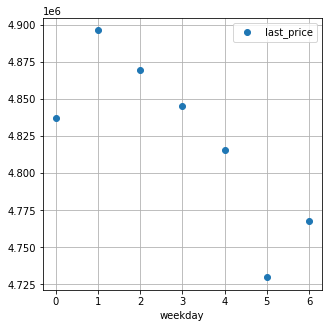

Корреляция между стоимостью квартиры и днем недели размещения объявления: -0.015812293600318484


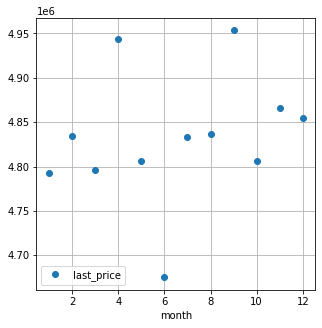

Корреляция между стоимостью квартиры и месяцем размещения объявления: 0.00620997851123904


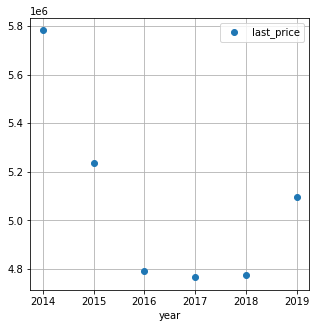

Корреляция между стоимостью квартиры и годом размещения объявления: -0.0019875702774940526


In [ ]:
# Зависимость от дня размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция между стоимостью квартиры и днем недели размещения объявления:', data['weekday'].corr(data['last_price']))
# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция между стоимостью квартиры и месяцем размещения объявления:', data['month'].corr(data['last_price']))
# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция между стоимостью квартиры и годом размещения объявления:', data['year'].corr(data['last_price']))

<b>Зависимость стоимости недвижимости от дня недели размещения.</b> 

Стоимость недвижимости падает с начала недели к концу. В понедельник и пятницу наблюдается провал. Причину этого я не могу объяснить.

<b>Зависимость стоимости недвижимости от месяца размещения.</b> 

Стоимости жилья по месяцам практически не изменяется и колеблется в пределах 150 тыс. рублей. В апреле и сентябре есть резкий рост, а в июне резкий спад.

<b>Зависимость стоимости недвижимости от года размещения.</b> 

Прослеживается спад стоимости недвижимости с 2014 по 2016 год, далее стоимость до 2018 год практически не изменяется, а в 2019 начинается активный рост. Возможно это связано с кризисов в 2014 году. 

Связи между временем размещения объявления и стоимостью квартиры нет.

#### Анализ стоимости квадратного метра в топ-10 городах

In [ ]:
city_top_10_list = data['locality_name'].value_counts().head(10)
city_top_10 = data.query('locality_name in @city_top_10_list.index')
display(city_top_10.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_type,living_ratio,kitchen_ratio
0,20,NaN,108.00,2019-03-07,3.0,2.70,16,51.00000,8,False,...,2,755.0,NaN,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1.0,2.65,11,18.60000,1,False,...,0,NaN,81.0,82920.792079,1,12,2018,fist,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2.0,2.65,5,34.30000,4,False,...,2,574.0,NaN,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,NaN,NaN,2015-07-24,3.0,2.65,14,NaN,9,False,...,3,234.0,424.0,408176.100629,4,7,2015,other,0.571174,0.175075
4,2,10000000.0,100.00,2018-06-19,2.0,NaN,14,32.00000,13,False,...,1,48.0,121.0,100000.000000,1,6,2018,other,0.320000,0.410000
6,6,3700000.0,37.30,2017-11-02,1.0,2.65,26,10.60000,6,False,...,0,NaN,155.0,99195.710456,3,11,2017,other,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2.0,2.65,24,40.89605,22,False,...,0,NaN,NaN,110544.692737,3,4,2019,other,0.571174,0.263966
8,20,2900000.0,33.16,2018-05-23,1.0,2.65,27,15.43000,26,False,...,0,NaN,189.0,87454.764777,2,5,2018,other,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3.0,2.50,9,43.60000,7,False,...,0,NaN,289.0,88524.590164,6,2,2017,other,0.714754,0.106557
10,5,5050000.0,39.60,2017-11-16,1.0,2.67,12,20.30000,3,False,...,2,553.0,137.0,127525.252525,3,11,2017,other,0.512626,0.214646


In [ ]:
city_top_10.groupby('locality_name')['price_per_m2'].mean().sort_values(ascending=False)

locality_name
Санкт-Петербург      114868.877341
Пушкин               103125.819291
деревня Кудрово       92473.547576
посёлок Парголово     90175.913458
посёлок Мурино        85673.259928
посёлок Шушары        78551.344545
Колпино               75424.579098
Гатчина               68746.146763
Всеволожск            68654.473986
Выборг                58141.909153
Name: price_per_m2, dtype: float64

Как и ожидалось, самая высокая стоимость за квадратный метр в Санкт-Петербурге. Самая низкая - в Выборге.

#### Определение границы центрального района Санкт-Петербурга

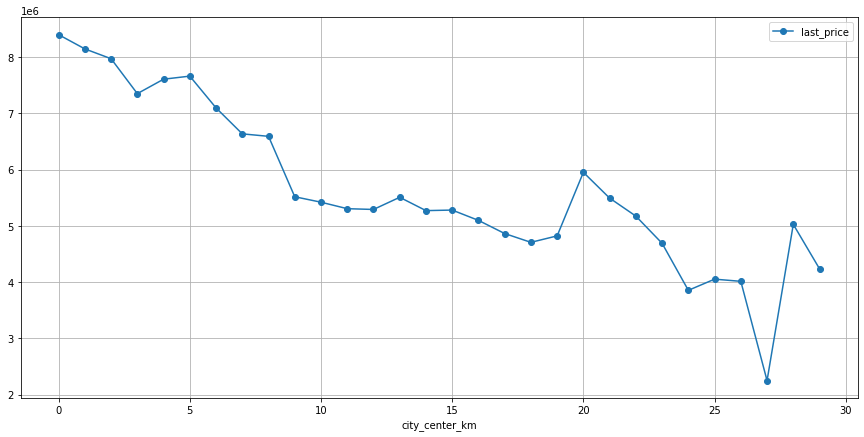

In [ ]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
data['city_center_km'] = (data['cityCenters_nearest'] / 1000).round(0)
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_center_km', values='last_price')
    .plot(grid=True, style='o-', figsize=(15,7))
)
plt.show()

На расстоянии 9 км от центра график становится пологим и понижение стоимости жилья происходит более плавно. Возможно, это и является границей центра города.

#### Анализ рынка недвижимости в центре Санкт-Петербурга

#### Анализ характеристик квартир

Создаем выборку по центру города

In [ ]:
center_spb = data.query('locality_name == "Санкт-Петербург" and city_center_km < 9' )

<b>Анализируем площадь квартир в центре Санкт-Петербурге и по всей базе.</b>

По всей выборке: 

count    22326.000000
mean        54.319704
std         19.331030
min         12.000000
25%         39.400000
50%         50.000000
75%         65.500000
max        114.200000
Name: total_area, dtype: float64 

По центру Санкт-Петербурга: 

count    3257.000000
mean       68.185920
std        22.548715
min        12.000000
25%        49.700000
50%        67.500000
75%        85.200000
max       114.200000
Name: total_area, dtype: float64


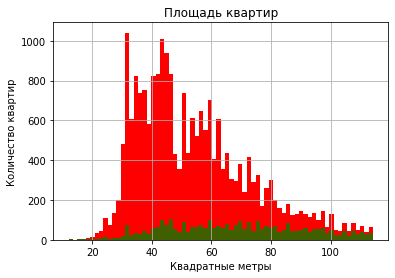

In [ ]:
print('По всей выборке:', '\n')
print(data['total_area'].describe(), '\n')
print('По центру Санкт-Петербурга:', '\n')
print(center_spb['total_area'].describe())

plt.hist(data['total_area'], bins=70, color = 'r', alpha = 1)
plt.hist(center_spb['total_area'], bins=70, color = 'g', alpha = 0.75)
plt.grid(True)
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Площадь квартир в центре в среднем больше, чем в целом по базе - примерно на 17 метров. Также распределение количества квартир с различными площадями в центре более равномерное, чем в общей базе (в базе сушествует 2 пика).

<b>Анализируем стоимость квартир в центре Санкт-Петербурга и по всей базе.</b>

По всей выборке: 

count    2.151900e+04
mean     4.837115e+06
std      2.215774e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.186686e+07
Name: last_price, dtype: float64 

По центру Санкт-Петербурга: 

count    2.758000e+03
mean     7.293950e+06
std      2.211162e+06
min      1.600000e+06
25%      5.650000e+06
50%      7.200000e+06
75%      8.990000e+06
max      1.186686e+07
Name: last_price, dtype: float64


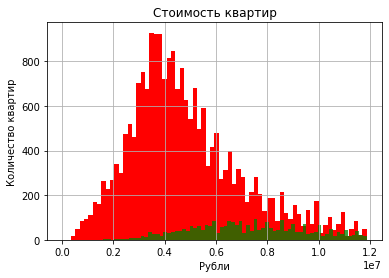

In [ ]:
print('По всей выборке:', '\n')
print(data['last_price'].describe(), '\n')
print('По центру Санкт-Петербурга:', '\n')
print(center_spb['last_price'].describe())

plt.hist(data['last_price'], bins=70, color = 'r', alpha = 1)
plt.hist(center_spb['last_price'], bins=70, color = 'g', alpha = 0.75)
plt.grid(True)
plt.title('Стоимость квартир')
plt.xlabel('Рубли')
plt.ylabel('Количество квартир')
plt.show()

Как и предполагалось, средняя стоимость квартир в центре значительно выше, чем по всей базе. В базе недвижимости есть пик квартир стоимостью от 3 до 5 млн. В списке квартир в центр Санкт-Петербурга нет четких пиков.

<b>Анализируем количество комнат в квартирах центра Санкт-Петербурга и по всей базе.</b>

По всей выборке: 

count    23371.000000
mean         2.030208
std          0.973563
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64 

По центру Санкт-Петербурга: 

count    3949.000000
mean        2.583692
std         1.102359
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64


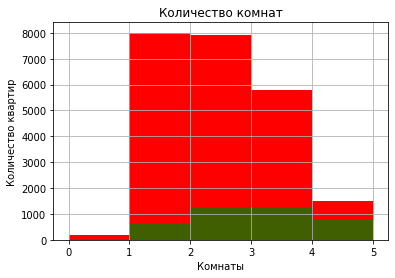

In [ ]:
print('По всей выборке:', '\n')
print(data['rooms'].describe(), '\n')
print('По центру Санкт-Петербурга:', '\n')
print(center_spb['rooms'].describe())

plt.hist(data['rooms'], bins=5, color = 'r', alpha = 1)
plt.hist(center_spb['rooms'], bins=5, color = 'g', alpha = 0.75)
plt.grid(True)
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')
plt.show()

plt.show()

В центре Санкт-Петербурга больше квартир с 2-4 комнатами, однако доля однокомнатных квартир в центре больше, чем доля однушек во всей базе.

<b>Анализируем высоту потолка в квартирах в центре Санкт-Петербурга и по всей базе.</b>

По всей выборке: 

count    20601.000000
mean         2.631089
std          0.081473
min          2.460000
25%          2.600000
50%          2.650000
75%          2.650000
max          2.850000
Name: ceiling_height, dtype: float64 

По центру Санкт-Петербурга: 

count    2261.000000
mean        2.660416
std         0.072497
min         2.460000
25%         2.650000
50%         2.650000
75%         2.650000
max         2.850000
Name: ceiling_height, dtype: float64


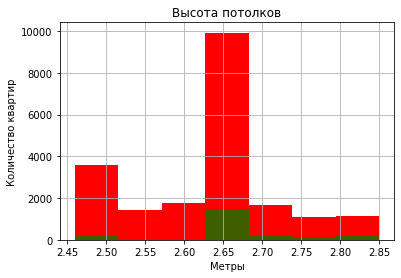

In [ ]:
print('По всей выборке:', '\n')
print(data['ceiling_height'].describe(), '\n')
print('По центру Санкт-Петербурга:', '\n')
print(center_spb['ceiling_height'].describe())

plt.hist(data['ceiling_height'], bins=7, color = 'r', alpha = 1)
plt.hist(center_spb['ceiling_height'], bins=7, color = 'g', alpha = 0.75)
plt.grid(True)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

plt.show()

Большинство квартир в центре Санкт-Петербурга имеют такую же высоту потолков, как и квартиры из общей базы - 2,65 метров.

#### Факторы влияюще на стоимость квартиры

<b>Зависимость стоимости квартиры от этажа, на которой она находится:</b>

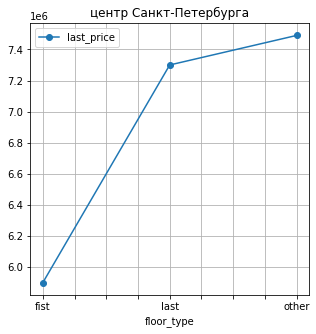

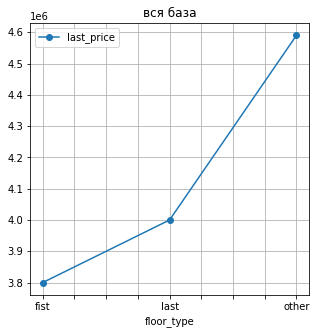

In [ ]:
(
    center_spb.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5), title='центр Санкт-Петербурга')
)
plt.show()

(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5), title='вся база')
)
plt.show()

Этаж, на котором находится квартира, влияет на ее стоимость, как в центре Санкт-Петербурга, так и во всей базе. Но последний этаж меньше влияет на стоимость квартиры в центре.

<b>Зависимость стоимости квартиры от количества комнат:</b>

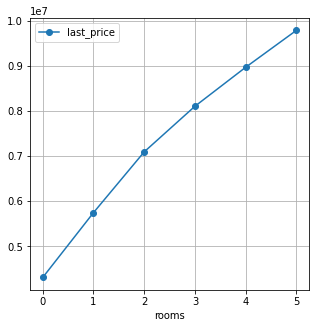

Зависимость стоимости квартир в центре Санкт-Петербурга от площади: 0.7144452903637727
Зависимость стоимости квартир по всей базе от площади: 0.6940523107096925


In [ ]:
(
    center_spb.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

print('Зависимость стоимости квартир в центре Санкт-Петербурга от площади:', 
      center_spb['last_price'].corr(center_spb['total_area']))
print('Зависимость стоимости квартир по всей базе от площади:', 
      data['last_price'].corr(data['total_area']))

Связь между стоимостью квартиры и количеством комнат в центре Санкт-Петербурга сильная. По всей базе связь чуть ниже

<b>Зависимость стоимости квартиры от удаленности от центра:</b>

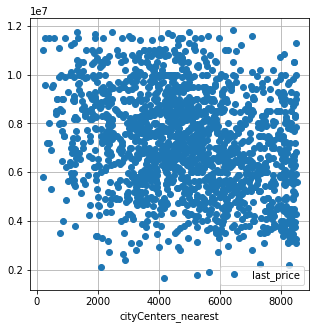

Зависимость стоимости квартир от удаленности от центра по центральной части Санкт-Петербурга: -0.1982092977506765
Зависимость стоимости квартир от удаленности от центра по всей базе: -0.3449266550741806


In [ ]:
(
    center_spb.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Зависимость стоимости квартир от удаленности от центра по центральной части Санкт-Петербурга:', center_spb['last_price'].corr(center_spb['cityCenters_nearest']))
print('Зависимость стоимости квартир от удаленности от центра по всей базе:', data['last_price'].corr(data['cityCenters_nearest']))

Связь между удаленностью квартиры от центра и ее стоимостью слабая. Возможно, это зависит от качества жилья.

<b>Зависимость стоимости жилья от даты размещения:</b>

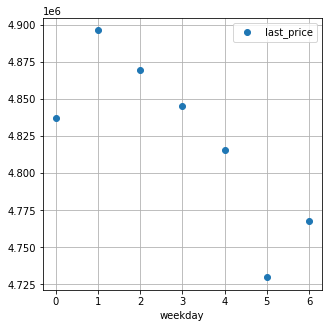

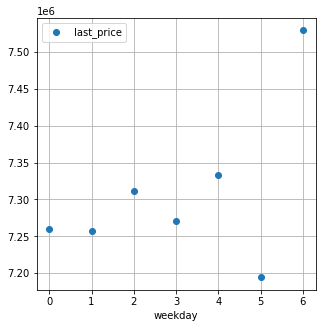

Корреляция между стоимостью квартиры и днем недели размещения объявления: -0.015812293600318484
Корреляция между стоимостью квартиры и днем недели размещения объявления по центру Санкт-Петербурга: 0.015291018810380022


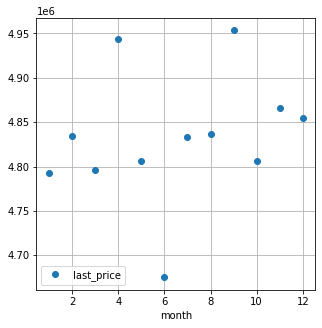

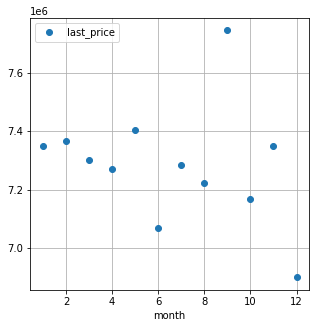

Корреляция между стоимостью квартиры и месяцем размещения объявления: 0.00620997851123904
Корреляция между стоимостью квартиры и месяцем размещения объявления по центру Санкт-Петербурга: -0.016065624599512936


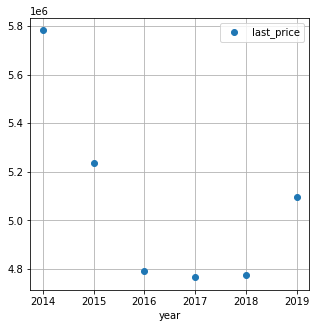

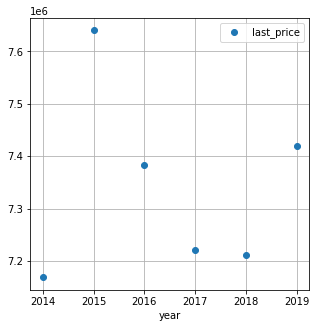

Корреляция между стоимостью квартиры и годом размещения объявления: -0.0019875702774940526
Корреляция между стоимостью квартиры и годом размещения объявления по центру Санкт-Петербурга: -0.027548937084048254


In [ ]:
# Зависимость от дня размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
(
    center_spb.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция между стоимостью квартиры и днем недели размещения объявления:', data['weekday'].corr(data['last_price']))
print('Корреляция между стоимостью квартиры и днем недели размещения объявления по центру Санкт-Петербурга:',
      center_spb['weekday'].corr(center_spb['last_price']))

# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
(
    center_spb.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция между стоимостью квартиры и месяцем размещения объявления:', data['month'].corr(data['last_price']))
print('Корреляция между стоимостью квартиры и месяцем размещения объявления по центру Санкт-Петербурга:',
      center_spb['month'].corr(center_spb['last_price']))


# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))    
)
(
    center_spb.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))    
)
plt.show()

print('Корреляция между стоимостью квартиры и годом размещения объявления:', 
      data['year'].corr(data['last_price']))
print('Корреляция между стоимостью квартиры и годом размещения объявления по центру Санкт-Петербурга:',
      center_spb['year'].corr(center_spb['last_price']))

Зависимость между стоимостью квартир и датой размещения низкая. Связь нет как в центре Санкт-Петербурга, так и по всей базе.

<b>Зависимость стоимости недвижимости в Санкт-Петербурге и во всей базе от дня недели размещения.</b>

В Санкт-Петербурге нет четкой зависимости стоимости недвижимости от дня недели размещения объявления. 
Стоимость недвижимости по базе падает с начала недели к концу. В понедельник и пятницу наблюдается провал. Причину этого я не могу объяснить.

<b>Зависимость стоимости недвижимости в Санкт-Петербурге и во всей базе от месяца размещения.</b>

В Санкт-Петербурге стоимость недвижимости не изменяется в зависимости от месяца размещения и лежит в интервале от 7.1 - 7.4 млн.рублей. Имеется резкий спад в декабре и резкий рост в сентябре.

Стоимости жилья по базе по месяцам размещения объявления практически не изменяется и колеблется в пределах 150 тыс. рублей. В апреле и сентябре есть резкий рост, а в июне резкий спад.

<b>Зависимость стоимости недвижимости В Санкт-Петербурге и во всей базе от года размещения.</b>

Прослеживается спад стоимости недвижимости с 2014 по 2016 год, далее стоимость до 2018 год практически не изменяется, а в 2019 начинается активный рост. Возможно это связано с кризисов в 2014 году.

В Санкт-Петербурге в отличии от всей базы в 2014 году стоимость недвижимости самая низкая, в 2015 резкий рост и небольшое падение в 2016, это может быть тоже реакцией на кризис. Рост связан с тем, что повысился спрос на недвижимость как инвестиции. По остальным годам картина похожа на ситуацию по всей базе.

## Общий вывод

<b>Срок продажи квартиры</b>

Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше года - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько десятков месяцев.

<b>Факторы, влияющие на стоимость</b>

На стоимость больше влияет площадь квартиры, нежели число комнат.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

<b>Стоимость квадратного метра в топ-10 населённых пунктов</b>

Дороже всего квадратный метр в Санкт-Петербурге - 114848
Дешевле всего квадратный метр в Выборге - 58141

<b>Факторы, влияющие на стоимость недвижимости в центре Санкт-Петербурга</b>

В центре города практически нет разницы, насколько квартира удалена от условного центра города.
В центре города последний этаж влияет на стоимость квартиры меньше, чем во всей базе.
В центре площадь квартир в среднем больше, чем во всем регионе в целом.